<a href="https://colab.research.google.com/github/GitBerg/Machine_Learning_Study/blob/master/09-Avalia%C3%A7%C3%A3o%20de%20algoritmos%20de%20classifica%C3%A7%C3%A3o/Machine_Learning_Avalia%C3%A7%C3%A3o_De_Algoritmos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Avaliação dos Algoritmos



*  Naïve Bayes: 93.80
*  Árvore de decisão: 98.20
*  Random forest: 98.40
*  Regras: 97.40
*  Knn: 98.60
*  Regressão logística: 94.60
*  SVM: 98.80
*  Redes neurais: 99.80



###Tuning dos Parâmetros com GridSearch


---




####Preparação dos dados

In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [2]:
import pickle
with open('credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [3]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [4]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [5]:
import numpy as np
X_credit = np.concatenate((X_credit_treinamento, X_credit_teste), axis = 0)
X_credit.shape

(2000, 3)

In [6]:
X_credit

array([[-1.3754462 ,  0.50631087,  0.10980934],
       [ 1.45826409, -1.6489393 , -1.21501497],
       [-0.79356829,  0.22531191, -0.43370226],
       ...,
       [ 1.37445674, -1.05746281, -1.12564819],
       [-1.57087737, -0.63488173, -0.36981671],
       [-1.03572293, -0.93978122,  0.04244312]])

In [7]:
y_credit = np.concatenate((y_credit_treinamento, y_credit_teste), axis = 0)
y_credit.shape

(2000,)

In [8]:
y_credit

array([0, 0, 0, ..., 0, 1, 1])

###Árvore de decisão

In [9]:
parametros = {'criterion' : ['gini', 'entropy'],
               'splitter' : ['best', 'random'],
               'min_samples_split' : [2, 5, 10],
               'min_samples_leaf' : [1, 5, 10]}

In [11]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
0.983


###Random Forest

In [12]:
parametros = {'criterion' : ['gini', 'entropy'],
               'n_estimators' : [10, 40, 100, 150],
               'min_samples_split' : [2, 5, 10],
               'min_samples_leaf' : [1, 5, 10]}

In [13]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
0.9865


###Knn

In [16]:
parametros = {'n_neighbors' : [3, 5, 10, 20],
              'p' : [1, 2]}

In [17]:
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'n_neighbors': 20, 'p': 1}
0.9800000000000001


###Regressão Logística

In [18]:
parametros = {'tol' : [0.0001, 0.00001, 0.000001],
              'C' : [1.0 , 1.5 , 2.0],
              'solver' : ['lbfgs' , 'sag', 'saga']}

In [19]:
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001}
0.9484999999999999


###SVM

In [20]:
parametros = {'tol' : [0.0001, 0.00001, 0.000001],
              'C' : [1.0, 1.5, 2.0],
              'kernel' : ['rbf', 'linear','poly', 'sigmoid']}

In [21]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 1.5, 'kernel': 'rbf', 'tol': 0.0001}
0.9829999999999999


###Redes Neurais

In [22]:
parametros = {'activation' : ['relu', 'logistic', 'tahn'],
              'solver' : ['adam', 'sgd'],
              'batch_size' : [10, 56]}

In [ ]:
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_

In [24]:
print(melhores_parametros)
print(melhor_resultado)

{'activation': 'relu', 'batch_size': 56, 'solver': 'adam'}
0.9970000000000001


##Validação Cruzada

In [26]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
resultados_arvore = []
resultados_random_forest = []
resultados_knn = []
resultados_logistica = []
resultados_svm = []
resultados_rede_neural = []

for i in range(30):
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)

  arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
  scores = cross_val_score(arvore, X_credit, y_credit, cv = kfold)
  ##print (scores)
  ##print(scores.mean())
  resultados_arvore.append(scores.mean())

  random_forest = RandomForestClassifier(criterion='entropy', min_samples_leaf = 1, min_samples_split= 5, n_estimators= 100 )
  scores = cross_val_score(random_forest, X_credit, y_credit,cv = kfold)
  resultados_random_forest.append(scores.mean())

  knn = KNeighborsClassifier(n_neighbors = 20, p = 1)
  scores = cross_val_score(knn, X_credit, y_credit,cv = kfold)
  resultados_knn.append(scores.mean())

  logistica = LogisticRegression(solver = 'lbfgs', C = 1.0, tol = 0.0001)
  scores = cross_val_score(logistica, X_credit, y_credit,cv = kfold)
  resultados_logistica.append(scores.mean())

  svm = SVC(kernel = 'rbf', C = 1.5, tol = 0.0001)
  scores = cross_val_score(svm, X_credit, y_credit,cv = kfold)
  resultados_svm.append(scores.mean())

  rede_neural = MLPClassifier(activation = 'relu', solver = 'adam', batch_size = 56)
  scores = cross_val_score(rede_neural, X_credit, y_credit,cv = kfold)
  resultados_rede_neural.append(scores.mean())

In [48]:
import pandas as pd
resultados = pd.DataFrame({'Arvore' : resultados_arvore, 'Random_forest' : resultados_random_forest, 
                           'KNN' : resultados_knn, 'Logistica' : resultados_logistica,
                           'SVM' : resultados_svm, 'Rede neural' : resultados_rede_neural})
resultados

,Arvore,Random_forest,KNN,Logistica,SVM,Rede neural
0,0.9860,0.9880,0.9800,0.9475,0.9835,0.9970
1,0.9845,0.9865,0.9800,0.9465,0.9835,0.9980
2,0.9905,0.9880,0.9800,0.9470,0.9835,0.9975
3,0.9880,0.9870,0.9800,0.9460,0.9845,0.9965
4,0.9885,0.9915,0.9810,0.9465,0.9855,0.9980
5,0.9890,0.9895,0.9785,0.9465,0.9830,0.9980
6,0.9885,0.9865,0.9800,0.9470,0.9840,0.9970
7,0.9875,0.9895,0.9805,0.9480,0.9845,0.9965
8,0.9860,0.9895,0.9810,0.9465,0.9820,0.9955
9,0.9875,0.9880,0.9810,0.9465,0.9830,0.9970


In [49]:
resultados.describe()

,Arvore,Random_forest,KNN,Logistica,SVM,Rede neural
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.987233,0.987450,0.980200,0.946950,0.983950,0.997133
std,0.001823,0.001404,0.001270,0.000687,0.001155,0.000601
min,0.982500,0.985000,0.977500,0.945500,0.982000,0.995500
25%,0.986000,0.986500,0.979625,0.946500,0.983125,0.997000
50%,0.987250,0.987500,0.980000,0.947000,0.984000,0.997000
75%,0.988500,0.988000,0.981000,0.947500,0.984500,0.997500
max,0.990500,0.991500,0.983500,0.948500,0.987000,0.998000


In [50]:
resultados.var()

Arvore           3.322989e-06
Random_forest    1.971552e-06
KNN              1.613793e-06
Logistica        4.715517e-07
SVM              1.333621e-06
Rede neural      3.609195e-07
dtype: float64

In [52]:
(resultados.std()/resultados.mean()) * 100

Arvore           0.184648
Random_forest    0.142197
KNN              0.129601
Logistica        0.072517
SVM              0.117366
Rede neural      0.060249
dtype: float64

##Teste de Normalidade nos Resultados

In [53]:
alpha = 0.05

In [54]:
from scipy.stats import shapiro

In [57]:
shapiro(resultados_arvore), shapiro(resultados_random_forest), shapiro(resultados_knn), shapiro(resultados_logistica),shapiro(resultados_svm), shapiro(resultados_rede_neural)

((0.9725302457809448, 0.6104708313941956),
 (0.951496958732605, 0.1853843629360199),
 (0.9244088530540466, 0.03495403751730919),
 (0.9370993375778198, 0.07600117474794388),
 (0.9658124446868896, 0.4317886233329773),
 (0.9069658517837524, 0.012486547231674194))

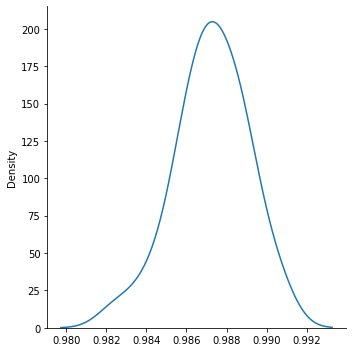

In [59]:
import seaborn as sns
sns.displot(resultados_arvore, kind = 'kde');

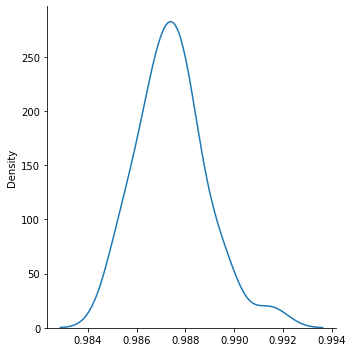

In [60]:
sns.displot(resultados_random_forest, kind = 'kde');

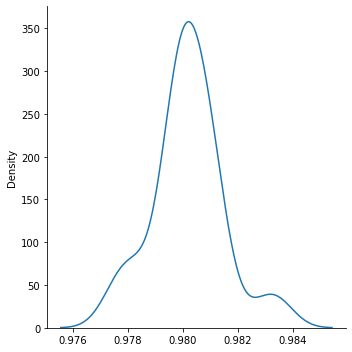

In [61]:
sns.displot(resultados_knn, kind = 'kde');

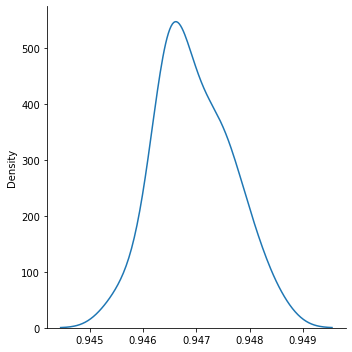

In [62]:
sns.displot(resultados_logistica, kind = 'kde');

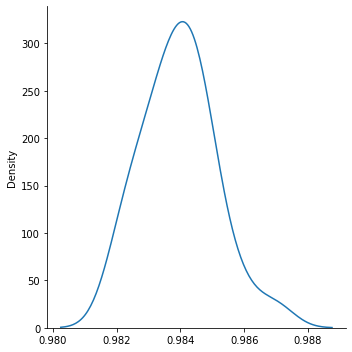

In [63]:
sns.displot(resultados_svm, kind = 'kde');

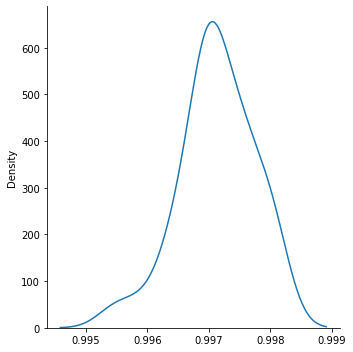

In [64]:
sns.displot(resultados_rede_neural, kind = 'kde');